<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Create Train and Test Sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Recode categoriacal variables; 
3. Exclude irrelevant variables or variables with too many missing values;
4. Rename variables in English and whenever possible with shorter names;
5. Perform correlation analysis on groups of variables; 
6. Visualize important predictors in the dataset. 

The datasets created here (`train` and `test`) will be used for the analysis in Module01_Models. 

### 1 - Load Data



In [ ]:
import pandas as pd

url_a = "https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing"
path_a = "https://drive.google.com/uc?export=download&id="+url_a.split("/")[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [ ]:
url_b = "https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing"
path_b = "https://drive.google.com/uc?export=download&id="+url_b.split("/")[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [ ]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Adjust Variables

In this section, we rename the variables in the dataset and then create two new ones: 

* `age`: age calculate from the birth year;
*   `default`: binary varible that takes 1 if the loan is in the repayment phase and the deliquency period is superior to 360 days.

In [ ]:
# Age
complete_set = complete_set[pd.to_numeric(complete_set["ANO_NASC"],errors='coerce').notna()]
complete_set = complete_set.assign(age = 2015 - (complete_set["ANO_NASC"]))

# Default
complete_set = complete_set.assign(default = 1*(complete_set["nu_dias_atraso"]>=360))

# Limiting the phases of the contract to include only individuals for which there is variation in `default`
complete_set = complete_set.loc[complete_set["fase_contrato"] != "Carencia"] 
complete_set = complete_set.loc[complete_set["fase_contrato"] != "Utilizacao"] 

complete_set.shape

(454152, 39)

In order to avoid encoding problems, we then limit the number of possible levels of some categorical variables: `NO_CURSO` = degree; `DS_OCUPACAO` = occupation; and `NU_ANO_SEMESTRE_INSCRICAO` = semester of enrollment. 



For `NO_CURSO`, we keep the top 20 leves and convert all the remaining to only one level (OUTROS). 

In [ ]:
# Limiting the levels of NO_CURSO
complete_set["NO_CURSO"].value_counts(normalize=True).head(20)

# Variable top 20 NO_CURSO
top_20_degrees = ['DIREITO', 'ADMINISTRAÇÃO','PEDAGOGIA','ENGENHARIA CIVIL',
                  'ENFERMAGEM', 'CIÊNCIAS CONTÁBEIS', 'EDUCAÇÃO FÍSICA',
                  'PSICOLOGIA', 'FISIOTERAPIA', 'ENGENHARIA DE PRODUÇÃO',
                  'ODONTOLOGIA', 'ENGENHARIA MECÂNICA', 'ARQUITETURA E URBANISMO',
                  'NUTRIÇÃO', 'SERVIÇO SOCIAL', 'GESTÃO DE RECURSOS HUMANOS',
                  'FARMÁCIA', 'BIOMEDICINA', 'ENGENHARIA ELÉTRICA', 'MEDICINA']

complete_set.NO_CURSO[~(complete_set["NO_CURSO"].isin(top_20_degrees))] = "OUTROS"

complete_set["NO_CURSO"].value_counts(normalize = True).head(22)

OUTROS                        0.213860
DIREITO                       0.126290
ADMINISTRAÇÃO                 0.107099
PEDAGOGIA                     0.079614
ENGENHARIA CIVIL              0.063170
ENFERMAGEM                    0.057959
CIÊNCIAS CONTÁBEIS            0.045863
EDUCAÇÃO FÍSICA               0.042567
PSICOLOGIA                    0.036043
FISIOTERAPIA                  0.026035
ENGENHARIA DE PRODUÇÃO        0.025044
ODONTOLOGIA                   0.021682
ENGENHARIA MECÂNICA           0.020605
ARQUITETURA E URBANISMO       0.020476
NUTRIÇÃO                      0.020242
SERVIÇO SOCIAL                0.019773
GESTÃO DE RECURSOS HUMANOS    0.017223
FARMÁCIA                      0.016268
BIOMEDICINA                   0.014414
ENGENHARIA ELÉTRICA           0.013242
MEDICINA                      0.012529
Name: NO_CURSO, dtype: float64

For `DS_OCUPACAO`, we create a binary variable where 1 equals being a student, and 0 everything else. 

In [ ]:
# Limiting the levels of DS_OCUPACAO
complete_set.DS_OCUPACAO[complete_set["DS_OCUPACAO"]!= "Estudante"] = "OUTRAS"
complete_set["DS_OCUPACAO"].value_counts(normalize=True).head(20)

OUTRAS       0.54083
Estudante    0.45917
Name: DS_OCUPACAO, dtype: float64

For `NU_ANO_SEMESTRE_INSCRICAO`, we keep the 6 most current levels, and convert all others to "before_2012". 

In [ ]:
# Limiting the levels of semester_enroll

top_semesters = ['12014', '12013', '22014', '22013', '12012', '22012']
complete_set.NU_ANO_SEMESTRE_INSCRICAO.loc[~(complete_set["NU_ANO_SEMESTRE_INSCRICAO"].isin(top_semesters))] = "before_2012"
complete_set["NU_ANO_SEMESTRE_INSCRICAO"].value_counts(normalize=True).head(20)

12014          0.234159
12013          0.232528
22013          0.140453
22014          0.128682
12012          0.122186
22012          0.087462
before_2012    0.054530
Name: NU_ANO_SEMESTRE_INSCRICAO, dtype: float64

In [ ]:
# Rename variables
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_RACA_COR" : "ethnicity",
            "NU_ANO_CONCLUSAO_ENSINO_MEDIO":"high_school_endyear",
            "SG_UF_CURSO": "state_course",
            "QT_SEMESTRES_CURSO": "n_sem_course",
            "VL_SEMESTRE_COM_DESCONTO": "tuition_discounted",
            "NU_PERCENT_SOLICITADO_FINANC":"perc_requested",
            "VL_FINANC_RECURSO_ALUNO":"student_resource",
            "ANO_NASC":"birth_year",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income",
            "VL_RENDA_FAMILIAR_BRUTA_MENSAL": "family_income",
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "n_completed_sem",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
print(complete_set.columns)

Index(['semester_enroll', 'gender', 'occupation', 'marital_status',
       'family_income', 'personal_income', 'NO_MUNICIPIO', 'SG_UF',
       'ethnicity', 'public_hs', 'high_school_endyear',
       'NU_SEMESTRE_REFERENCIA', 'state_course', 'degree', 'igc', 'cpc', 'cc',
       'n_sem_course', 'n_completed_sem', 'sem_funded',
       'QT_MESES_FINANC_SEMESTRE_ATUAL', 'fam_size', 'income_pc',
       'VL_SEMESTRE_SEM_DESCONTO', 'tuition_discounted', 'tuition_current',
       'inc_prop', 'perc_requested', 'loan_value_sem', 'student_resource',
       'loan_value', 'loan_limit', 'date_contract', 'contract_phase',
       'nu_dias_atraso', 'total_debt', 'birth_year', 'age', 'default'],
      dtype='object')


### 3 - Clean Dataset

In this section we drop unecessary variables, deal with wrong entries and outliers, drop NA's and adjust variable types.

Most of the variables were dropped due to inconsistencies and missing data. `nu_dias_atraso` was dropped as it was used to create the binary target variable `default`.

In [ ]:
variables_to_drop = ["NO_MUNICIPIO", # municipality
                     "SG_UF", # state
                     "VL_SEMESTRE_SEM_DESCONTO", # value of semester without discount
                     "NU_SEMESTRE_REFERENCIA", # semester of reference
                     "nu_dias_atraso", # period of deliquency
                     "QT_MESES_FINANC_SEMESTRE_ATUAL", # number of months for loans
                     "cpc", # university evaluation
                     "cc"] # university evaluation

complete_set_clean = complete_set.drop(variables_to_drop, axis = 1)                

The variable `loan_value_sem` (value of loan in the semester) has over 7,000 entries that are above 99 milion reais. We assume they are coding errors and recalculate them to be the equal to the value of the tuition (`tuition_current`) times the percentage of tuition requested as a loan (`perc_requested`). We also eliminate 4 outliers from `family_income`. Finally we filter `age` to include values ranging between 10 and 100 years old only. 



In [ ]:
import numpy as np

complete_set_clean['loan_value_sem'] = np.where((complete_set_clean.loan_value_sem > 300000), 
                                          (complete_set_clean["perc_requested"]/100 * complete_set_clean["tuition_current"]), 
                                          complete_set_clean.loan_value_sem)

In [ ]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['family_income'] < 100000)] 

In [ ]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['age'] < 100) & (complete_set_clean['age'] > 10)] 

For the variables in the list below, we drop NAs, as they do not make up a large share of observations. 

In [ ]:
complete_set_clean = complete_set_clean.dropna(subset=["semester_enroll",
                                                      "gender",
                                                       "occupation",
                                                       "marital_status",
                                                       "ethnicity",
                                                       "public_hs",
                                                       "state_course",
                                                       "degree",
                                                       "igc",
                                                       "contract_phase",
                                                       "high_school_endyear"])

The last step is adjusting some variable types. 

In [ ]:
import datetime as dt
              
complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)
complete_set_clean = complete_set_clean.astype({"semester_enroll":str, "igc":int})

 ### 4 - Correlation Matrix

In this section, we perform a quick correlation analysis. The only variable to be dropped is `tuition_discounted`, since it has perfect correlation with another variable (`tuition_current`). The remainder will be subject to further analysis in the future. 

In [ ]:
corr_matrix = complete_set_clean.corr()
corr_matrix['default'].sort_values(ascending=False, key=pd.Series.abs)

default                1.000000
family_income         -0.245497
income_pc             -0.223941
n_sem_course          -0.180687
perc_requested         0.180169
student_resource      -0.175306
loan_value            -0.143912
tuition_discounted    -0.132852
tuition_current       -0.131339
sem_funded            -0.122057
fam_size              -0.109477
igc                   -0.094080
inc_prop               0.089520
loan_limit            -0.088000
loan_value_sem        -0.073557
total_debt            -0.069333
n_completed_sem       -0.044509
personal_income       -0.028472
date_contract          0.010705
high_school_endyear    0.010702
Name: default, dtype: float64

For the analysis, two subsets were created: 

* `corr_income`: containing variables related to family income;
* `corr_tuition`: containing variables related to tuition value.

In [ ]:
corr_income = complete_set_clean[['family_income', 'income_pc', 'fam_size', 'default']].copy()
corr_tuition = complete_set_clean[['tuition_discounted', 'tuition_current', 'loan_limit', 'loan_value_sem', 'loan_value', 'perc_requested', 'default']].copy()

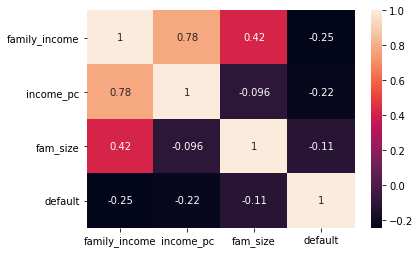

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = corr_income.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

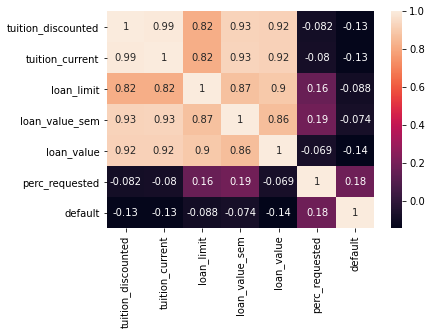

In [ ]:
corrMatrix = corr_tuition.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
complete_set_clean = complete_set_clean.drop("tuition_discounted", axis=1)

### 5 - Creat Train and Test Sets

In this section we create the training and test sets using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our original data includes 637,822 instances. After cleaning the dataset, we still have 438,752 instances. Thus, we assume it is big enough and do not employ stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(complete_set_clean, test_size=0.2, random_state=42)

In [ ]:
train.shape

(351001, 30)

In [ ]:
test.shape

(87751, 30)

### 6 - Visualization
Here we present some graphs of important variables in the training set.

The first graph shows that we have an unbalanced training set. Around 60% of the instances are labeled as 0 (good borrowers) while around 40% are labeled as 1 (bad borrrowers.)

Text(-15.200000000000003, 0.5, 'Counts')

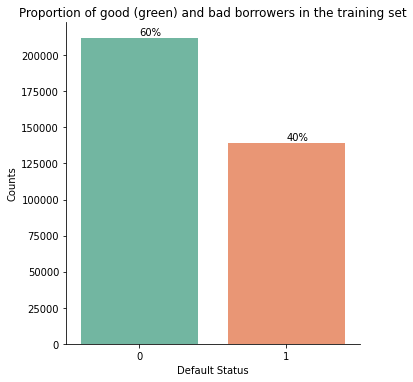

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

default_0 = "{:.0%}".format(sum(train["default"]==0)/len(train))
default_1 = "{:.0%}".format(sum(train["default"]==1)/len(train))

sns.catplot(x="default", kind="count", palette="Set2", data=train)
plt.annotate(default_0, xy=(0,214000))
plt.annotate(default_1, xy=(1,141000))
plt.title("Proportion of good (green) and bad borrowers in the training set")
plt.xlabel("Default Status")
plt.ylabel("Counts")

We assumed we would have more distinct distributions of age for the two default status because some previous work found that age is a good predictor of default. Here, however, the distributions seem pretty similar.

In [ ]:
train = train.astype({"age":float})

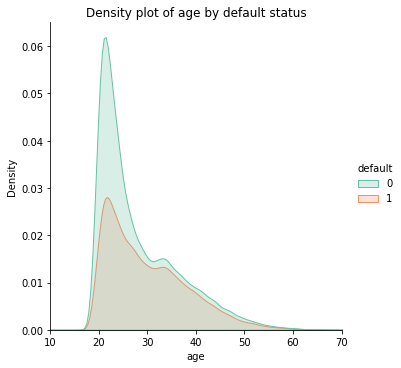

In [ ]:
plot_age = sns.displot(train, x="age", kind="kde", hue = "default", palette="Set2", fill = "true")
plt.title("Density plot of age by default status")
plot_age.set(xlim=(10, 70))
plt.show()

As we saw previously, income per capita is a good predictor of default status. Above we can see that for values higher than 1000, the probability of being a good borrower (green) is a lot higher than the default probability.

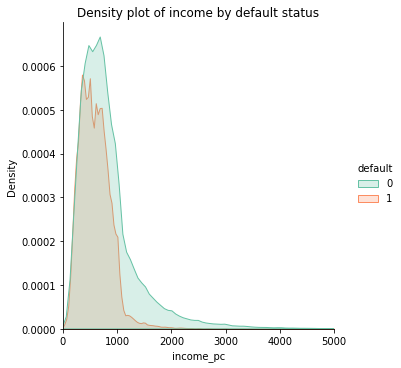

In [ ]:
plot_income = sns.displot(train, x="income_pc", kind="kde", hue ="default",palette="Set2", fill = "true" )
plt.title("Density plot of income by default status")
plot_income.set(xlim=(0, 5000))

### 7 - Save Sets

In [ ]:
#from google.colab import files

# Training dataset
train.to_csv('train.csv', index=False)
#files.download('train.csv')

# Test dataset
test.to_csv('test.csv', index=False)
#files.download('test.csv')